### Dados dos Medicamentos comercializados no Brasil atualmente 

No início da história, as farmácias eram espaços simples, e o acesso aos medicamentos nem sempre era fácil.
Nos dias atuais podemos notar um grande numero de farmácias e uma vasta gama de medicamentos, trazendo muitas vezes um pouco de insegurança por parte do consumidor na hora da aquisição dos mesmos. 
     
A questão dos genéricos, por exemplo, trouxe consigo debates sobre qualidade e confiança. As pessoas hesitavam em abandonar as marcas tradicionais, mas com o tempo, perceberam que os genéricos eram igualmente eficazes e mais acessíveis.
Os laboratórios brasileiros, em parceria com outros países, demonstraram que a ciência e a solidariedade eram as armas mais poderosas contra as ameaças à saúde. 


#### Projeto
Para a elaboração do projeto foi utilizado o seguinte dataset:

https://dados.gov.br/dados/conjuntos-dados/preco-de-medicamentos-no-brasil-consumidor


Os dados representam a lista de Medicamentos , contemplando informações sobre os precos , tipos, restricoes de venda entre outros como descritos abaixo: 
<font size="1">

    APRESENTAÇÃO:É a descrição de como o medicamento é apresentado, quanto a sua forma farmacêutica, dosagem e quantidade.
    CLASSE TERAÊUTICA: É a Classificação Anatômica de Produtos Farmacêuticos.
    CNPJ:  Códio de identificação da pessoa jurídica.
    COMERCIALIZAÇÃO 22:  Refere-se à informação se o produto foi ou não comercializado pelo detentor do registro, no ano de 2022
    LABORATÓRIO: É o nome da empresa detentora do registro sanitário podendo ser a produtora ou importadora do medicamento.
    LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO: Classificação fiscal dos medicamentos,conforme o regime tributário. 
    PF: indica o preço máximo permitido para venda a farmácias e drogarias.
    PMC: Preço Máximo ao Consumidor indica o preço teto de venda ao consumidor. 
    TARJA: Indica qual se a venda do medicamento necessita de receita.
    TIPO DE PRODUTO: Tipo é a categorização do medicamento por tipo de produto.
</font>



### 1. Importação das Bibliotecas e do arquivo CSV

In [88]:
# Instalação das bibliotecas e importação das mesmas
#pip install pandas matplotlib numpy seaborn

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [89]:
#Referenciar o local onde o arquivo csv se encontra e realizar uma copia do df original
df_original = pd.read_csv (r"C:\Users\Casa\Desktop\Projeto\medicamentos_anvisa.csv" , sep="," , encoding='UTF-8')
df = df_original.copy()

## 2. Verificação e manipulacao dos dados



In [90]:
df.head()

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),REGIME DE PREÇO,PF Sem Impostos,PF 0%,...,PMC 20%,PMC 21%,PMC 22%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2022,TARJA
0,BUTILBROMETO DE ESCOPOLAMINA,61.082.426/0002-07,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,BUSCOPAN,20 MG SOL INJ CT 5 AMP VD TRANS X 1 ML,A3A - ANTIESPASMÓDICOS E ANTICOLINÉRGICOS PUROS,Novo,Regulado,7.93,8.88,...,15.24,15.46,15.68,Não,Não,Não,Não,Negativa,Sim,Tarja Vermelha
1,DIPIRONA MONOIDRATADA/BUTILBROMETO DE ESCOPOLA...,61.082.426/0002-07,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,BUSCOPAN COMPOSTO,"(4,0 + 500,0) MG/ML SOL INJ IV/IM CT 3 AMP VD ...",A3D - ASSOCIAÇÕES DE ANTIESPASMÓDICOS COM ANAL...,Novo,Regulado,11.00,12.32,...,21.15,21.45,21.75,Não,Não,Não,Não,Negativa,Sim,Tarja Vermelha
2,SULFATO DE MAGNÉSIO HEPTAIDRATADO,05.155.425/0001-93,VASCONCELOS INDUSTRIA FARMACEUTICA E COMERCIO ...,SULFATO DE MAGNÉSIO HEPTAHIDRATADO,10% SOL INJ IV CX 50 FR AMP VD TRANS X 50 ML,K4A2 - SOLUÇÕES ELETROLÍTICAS (>20ML E <100ML),Específico,Regulado,375.00,375.00,...,648.02,656.22,664.64,Não,Não,Não,Não,Positiva,Não,NaN
3,CIPIONATO DE TESTOSTERONA,00.923.140/0001-31,EMS SIGMA PHARMA LTDA,DEPOSTERON,100 MG/ML SOL INJ CX 3 AMP VD AMB X 2 ML,"G3B - ANDRÓGENOS EXCLUINDO G3E, G3F",Similar,Regulado,142.59,159.70,...,274.09,277.97,281.97,Não,Não,Não,Não,Negativa,Sim,Tarja Vermelha sob restrição
4,CLORIDRATO DE ESCETAMINA,51.780.468/0001-87,JANSSEN-CILAG FARMACÊUTICA LTDA,SPRAVATO,"140 MG/ML SOL SPR NAS CT FR VD TRANS X 0,2 ML ...",N6A9 - ANTIDEPRESSIVOS TODOS OS OUTROS,Novo,Regulado,1566.27,1754.22,...,NaN,NaN,NaN,Sim,Não,Não,Não,Negativa,Sim,Tarja Vermelha sob restrição


In [91]:
#detectar valores ausentes
df.isna().sum()

SUBSTÂNCIA                                                  0
CNPJ                                                        0
LABORATÓRIO                                                 0
PRODUTO                                                     0
APRESENTAÇÃO                                                0
CLASSE TERAPÊUTICA                                          4
TIPO DE PRODUTO (STATUS DO PRODUTO)                       324
REGIME DE PREÇO                                             4
PF Sem Impostos                                             4
PF 0%                                                       4
PF 12%                                                    895
PF 17%                                                    895
PF 17% ALC                                                895
PF 17,5%                                                  895
PF 17,5% ALC                                              895
PF 18%                                                    895
PF 18% A

In [92]:
#Remoção das colunas na copia do df_original e que nao serao usadas
df = df.drop(df.columns[10:36], axis=1)
#Criação de uma nova coluna para alocar os valores referente ao preco maximo para o consumidor (PCM)
PMC = 'PMC' 
nova_coluna = df_original['PMC 0%'].copy()
index_coluna = 10
df.insert(index_coluna, PMC, nova_coluna)
#Renomeção de colunas
df = df.rename(columns={'TIPO DE PRODUTO (STATUS DO PRODUTO)': 'TIPO','TARJA': 'CLASSIFICAÇÃO'})
df.head()

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO,REGIME DE PREÇO,PF Sem Impostos,PF 0%,PMC,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2022,CLASSIFICAÇÃO
0,BUTILBROMETO DE ESCOPOLAMINA,61.082.426/0002-07,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,BUSCOPAN,20 MG SOL INJ CT 5 AMP VD TRANS X 1 ML,A3A - ANTIESPASMÓDICOS E ANTICOLINÉRGICOS PUROS,Novo,Regulado,7.93,8.88,11.91,Não,Negativa,Sim,Tarja Vermelha
1,DIPIRONA MONOIDRATADA/BUTILBROMETO DE ESCOPOLA...,61.082.426/0002-07,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,BUSCOPAN COMPOSTO,"(4,0 + 500,0) MG/ML SOL INJ IV/IM CT 3 AMP VD ...",A3D - ASSOCIAÇÕES DE ANTIESPASMÓDICOS COM ANAL...,Novo,Regulado,11.00,12.32,16.53,Não,Negativa,Sim,Tarja Vermelha
2,SULFATO DE MAGNÉSIO HEPTAIDRATADO,05.155.425/0001-93,VASCONCELOS INDUSTRIA FARMACEUTICA E COMERCIO ...,SULFATO DE MAGNÉSIO HEPTAHIDRATADO,10% SOL INJ IV CX 50 FR AMP VD TRANS X 50 ML,K4A2 - SOLUÇÕES ELETROLÍTICAS (>20ML E <100ML),Específico,Regulado,375.00,375.00,518.42,Não,Positiva,Não,NaN
3,CIPIONATO DE TESTOSTERONA,00.923.140/0001-31,EMS SIGMA PHARMA LTDA,DEPOSTERON,100 MG/ML SOL INJ CX 3 AMP VD AMB X 2 ML,"G3B - ANDRÓGENOS EXCLUINDO G3E, G3F",Similar,Regulado,142.59,159.70,214.23,Não,Negativa,Sim,Tarja Vermelha sob restrição
4,CLORIDRATO DE ESCETAMINA,51.780.468/0001-87,JANSSEN-CILAG FARMACÊUTICA LTDA,SPRAVATO,"140 MG/ML SOL SPR NAS CT FR VD TRANS X 0,2 ML ...",N6A9 - ANTIDEPRESSIVOS TODOS OS OUTROS,Novo,Regulado,1566.27,1754.22,NaN,Não,Negativa,Sim,Tarja Vermelha sob restrição


## 3. Primeiras Analises

In [93]:
# Lista os 10 Laboratorios com maior variedade de medicamentos
df.value_counts('LABORATÓRIO').head(10)

LABORATÓRIO
EMS S/A                                            1709
ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A                1330
GERMED FARMACEUTICA LTDA                           1072
EUROFARMA LABORATÓRIOS S.A.                        1055
LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA          940
PRATI DONADUZZI & CIA LTDA                          904
SANOFI MEDLEY FARMACÊUTICA LTDA.                    868
GEOLAB INDÚSTRIA FARMACÊUTICA S/A                   767
CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA.     726
BRAINFARMA INDÚSTRIA QUÍMICA E FARMACÊUTICA S.A     671
Name: count, dtype: int64

In [94]:
#  Apresentacao dos tipos de medicamentos , removendo campos vazios atraves do dropna
tipo_medicamentos = df['TIPO'].value_counts(dropna=True).rename_axis('Tipo_Medicamento').reset_index(name='Quantidade')
tipo_medicamentos


,Tipo_Medicamento,Quantidade
0,Genérico,10511
1,Similar,9747
2,Novo,4179
3,Específico,2299
4,Biológico,1302
5,Fitoterápico,393
6,Produto de Terapia Avançada,41
7,Radiofármaco,1


In [125]:
#  Selecionar todos os produtos que possuem dipirona em sua substancia
df_substancia = df[df['PRODUTO'].str.contains("DIPIRONA")]
resultado_df = df_substancia.iloc[:, [3,2,4]]

resultado_df


,PRODUTO,LABORATÓRIO,APRESENTAÇÃO
3618,BROMETO DE N-BUTIL ESCOPOLAMINA + DIPIRONA SO...,EMS S/A,"6,67 MG/ML + 333,4 MG/ML SOL OR CT FR VD CGT ..."
3622,DIPIRONA MONOIDRATADA + BUTILBROMETO DE ESCOPO...,HIPOLABOR FARMACEUTICA LTDA,"(333,4 + 6,67) MG/ML SOL OR CT FR PLAS OPC GOT..."
3686,DIPIRONA + CAFEÍNA,BRAINFARMA INDÚSTRIA QUÍMICA E FARMACÊUTICA S.A,500 MG + 65 MG COM CT BL AL PLAS AMB X 100
9533,DIPIRONA SODICA + CLORIDRATO DE ADIFENINA + CL...,PRATI DONADUZZI & CIA LTDA,"5OO MG/1,5ML + 10MG/1,5ML +5MG/1,5ML SOL OR CT..."
12618,DIPIRONA SÓDICA,EMS S/A,50 MG/ML SOL OR CT FR VD AMB X 100 ML + COP
...,...,...,...
12862,CITRATO DE ORFENADRINA + DIPIRONA SÓDICA + CAF...,EMS S/A,35 MG/ML + 300 MG/ML + 50 MG/ML SOL OR CT FR P...
12886,DIPIRONA SÓDICA,NATIVITA IND. COM. LTDA.,500 MG/ML SOL OR CT FR PLAS OPC GOT X 10 ML
12887,DIPIRONA SÓDICA,NATIVITA IND. COM. LTDA.,500 MG/ML SOL OR CT 200 FR PLAS OPC GOT X 10 ML
12888,DIPIRONA SÓDICA,NATIVITA IND. COM. LTDA.,500 MG/ML SOL OR CT FR PLAS OPC GOT X 20 ML


In [96]:
#Criacao da funcao mascara para trazer todos os medicamentos com preco maximo consumidor acima de 10 mil reais
df.loc[[1] , ['PMC']]
mascara = (df['PMC'] > 10000)
df.loc[mascara]

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO,REGIME DE PREÇO,PF Sem Impostos,PF 0%,PMC,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2022,CLASSIFICAÇÃO
16,ADALIMUMABE,61.286.647/0001-16,SANDOZ DO BRASIL INDÚSTRIA FARMACÊUTICA LTDA,HYRIMOZ,40 MG SOL INJ CT BL PLAS X 2 SER VD PREENCH C/...,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,8617.00,8617.00,11912.50,Não,Positiva,Sim,Tarja Vermelha
17,ADALIMUMABE,61.286.647/0001-16,SANDOZ DO BRASIL INDÚSTRIA FARMACÊUTICA LTDA,HYRIMOZ,"40 MG SOL INJ CT 2 CANETA PREENCH X 0,8ML",L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,8617.00,8617.00,11912.50,Não,Positiva,Sim,Tarja Vermelha
28,ABEMACICLIBE,43.940.618/0001-44,ELI LILLY DO BRASIL LTDA,VERZENIOS,100 MG COM REV CT BL AL AL X 60,L1H - INIBIDORES DE PROTEINA QUINASE,Novo,Regulado,10393.41,11640.62,15615.48,Não,Negativa,Não,Tarja Vermelha
29,ABEMACICLIBE,43.940.618/0001-44,ELI LILLY DO BRASIL LTDA,VERZENIOS,150 MG COM REV CT BL AL AL X 30,L1H - INIBIDORES DE PROTEINA QUINASE,Novo,Regulado,7462.04,8357.49,11211.28,Não,Negativa,Sim,Tarja Vermelha
30,ABEMACICLIBE,43.940.618/0001-44,ELI LILLY DO BRASIL LTDA,VERZENIOS,150 MG COM REV CT BL AL AL X 60,L1H - INIBIDORES DE PROTEINA QUINASE,Novo,Regulado,14924.09,16714.98,22422.55,Não,Negativa,Sim,Tarja Vermelha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28318,VÍRUS DA HEPATITE A PURIFICADO INATIVADO,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,AVAXIM,160 U/ML SUS INJ CT 10 FA VD INC X 5 ML,J7E4 - VACINA PARA HEPATITE,Biológico,Regulado,8613.15,8613.15,11907.17,Não,Positiva,Não,NaN
28329,ZANUBRUTINIBE,55.980.684/0001-27,ADIUM S.A.,BRUKINSA,80 MG CAP DURA CT FR PLAS PEAD OPC X 120,L1H9 - OUTROS ANTINEOPLÁSICOS INIBIDORES DA PR...,Novo,Regulado,28390.80,31797.70,42655.48,Não,Negativa,Sim,Tarja Vermelha
28332,ZIDOVUDINA,33.781.055/0001-35,FUNDAÇÃO OSWALDO CRUZ,FAR-MANGUINHOS ZIDOVUDINA,100 MG CAP GEL DURA CX 35 FR PLAS OPC X 100,J5C1 - ANTIVIRAIS ANTI-HIV INIBIDORES DA TRANS...,Similar,Regulado,7778.50,7778.50,10753.32,Sim,Positiva,Sim,Tarja Vermelha (**)
28335,ZIDOVUDINA/LAMIVUDINA,33.781.055/0001-35,FUNDAÇÃO OSWALDO CRUZ,FAR-MANGUINHOS-LAMIVUDINA+ZIDOVUDINA,150 MG + 300 MG COM REV CX 35 FR PLAS OPC X 60,J5C1 - ANTIVIRAIS ANTI-HIV INIBIDORES DA TRANS...,Similar,Regulado,8573.62,8573.62,11852.53,Sim,Positiva,Sim,Tarja Vermelha


In [97]:
# Ordenar Medicamentos por Valor
df.sort_values('PF Sem Impostos' , ascending=False)

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO,REGIME DE PREÇO,PF Sem Impostos,PF 0%,PMC,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2022,CLASSIFICAÇÃO
22018,ONASEMNOGENO ABEPARVOVEQUE,56.994.502/0001-30,NOVARTIS BIOCIENCIAS S.A,ZOLGENSMA,"2,0X10E13 GV/ML SUS INJ CT 1 FA PLAS TRANS X 5...",M5X - TODOS OS OUTROS FÁRMACOS COM AÇÃO MÚSCUL...,Produto de Terapia Avançada,Regulado,6785898.88,7600207.96,NaN,Não,Negativa,Sim,Tarja Vermelha
22024,ONASEMNOGENO ABEPARVOVEQUE,56.994.502/0001-30,NOVARTIS BIOCIENCIAS S.A,ZOLGENSMA,"2,0X10E13 GV/ML SUS INJ CT 1 FA PLAS TRANS X 5...",M5X - TODOS OS OUTROS FÁRMACOS COM AÇÃO MÚSCUL...,Produto de Terapia Avançada,Regulado,6785898.88,7600207.96,NaN,Não,Negativa,Sim,Tarja Vermelha
22037,ONASEMNOGENO ABEPARVOVEQUE,56.994.502/0001-30,NOVARTIS BIOCIENCIAS S.A,ZOLGENSMA,"2,0 X 10E13 GV/ML SUS INJ CT 13 FA PLAS TRANS ...",M5X - TODOS OS OUTROS FÁRMACOS COM AÇÃO MÚSCUL...,Produto de Terapia Avançada,Regulado,6785898.88,7600207.96,NaN,Não,Negativa,Não,Tarja Vermelha
22038,ONASEMNOGENO ABEPARVOVEQUE,56.994.502/0001-30,NOVARTIS BIOCIENCIAS S.A,ZOLGENSMA,"2,0 X 10E13 GV/ML SUS INJ CT 2 FA PLAS TRANS X...",M5X - TODOS OS OUTROS FÁRMACOS COM AÇÃO MÚSCUL...,Produto de Terapia Avançada,Regulado,6785898.88,7600207.96,NaN,Não,Negativa,Não,Tarja Vermelha
22039,ONASEMNOGENO ABEPARVOVEQUE,56.994.502/0001-30,NOVARTIS BIOCIENCIAS S.A,ZOLGENSMA,"2,0 X 10E13 GV/ML SUS INJ CT 1 FA PLAS TRANS X...",M5X - TODOS OS OUTROS FÁRMACOS COM AÇÃO MÚSCUL...,Produto de Terapia Avançada,Regulado,6785898.88,7600207.96,NaN,Não,Negativa,Não,Tarja Vermelha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17462,IMUNOGLOBULINA HUMANA,58.430.828/0001-60,BLAU FARMACÊUTICA S.A.,IMUNOGLOBULIN,50 MG/ML SOL INJ CT FA VD INC X 20 ML,J6C - IMUNOGLOBULINAS POLIVALENTES INTRAVENOSAS,Similar,Regulado,0.01,0.01,NaN,Não,Positiva,Não,Tarja Vermelha (**)
940,ALENDRONATO DE SÓDIO TRI-HIDRATADO,00.923.140/0001-31,EMS SIGMA PHARMA LTDA,OSTEOFORM,70 MG COM CT BL AL PLAS OPC X 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8957,CLORIDRATO DE MOXIFLOXACINO,45.992.062/0001-65,GERMED FARMACEUTICA LTDA,CLORIDRATO DE MOXIFLOXACINO,400 MG COM REV CT BL AL AL X 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9408,CLORIDRATO DE PIOGLITAZONA,33.078.528/0001-32,TORRENT DO BRASIL LTDA,CLORIDRATO DE PIOGLITAZONA,45 MG COM CT BL AL/AL X 30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# Listar os 20 Medicamentos mais caros 
sorted_df = df.sort_values(['PF Sem Impostos','PF 0%'], ascending=False)
filtered_columns_df = sorted_df.iloc[:, [3,2, 7, 8,9,10]]
# Eliminar  duplicados com diversas formas de apresentacao
filtered_columns_df.drop_duplicates().head(20)


,PRODUTO,LABORATÓRIO,REGIME DE PREÇO,PF Sem Impostos,PF 0%,PMC
22004,ZOLGENSMA,NOVARTIS BIOCIENCIAS S.A,Regulado,6785898.88,7600207.96,NaN
5231,CARVYKTI®,JANSSEN-CILAG FARMACÊUTICA LTDA,Regulado,2266996.13,2539036.07,NaN
28250,LUXTURNA,NOVARTIS BIOCIENCIAS S.A,Regulado,2155753.34,2414444.13,NaN
2184,YESCARTA,GILEAD SCIENCES FARMACEUTICA DO BRASIL LTDA,Regulado,1573618.37,1762452.86,NaN
27338,KYMRIAH,NOVARTIS BIOCIENCIAS S.A,Regulado,1568166.09,1756346.30,NaN
12134,DICLORIDRATO DE DACLATASVIR,BLANVER FARMOQUIMICA E FARMACÊUTICA S.A.,Regulado,575496.67,644556.37,864649.42
28295,AMVUTTRA,SPECIALTY PHARMA GOIAS LTDA,Regulado,526743.19,589952.47,791400.23
28249,WAYLIVRA,PTC FARMACEUTICA DO BRASIL LTDA.,Regulado,483194.19,526535.43,711328.66
14025,EVEROLIMO,NATCOFARMA DO BRASIL LTDA,Regulado,404674.46,404674.46,NaN
14033,EXHER,NATCOFARMA DO BRASIL LTDA,Regulado,404674.46,404674.46,559438.70


## 3. Apresentação Graficos 

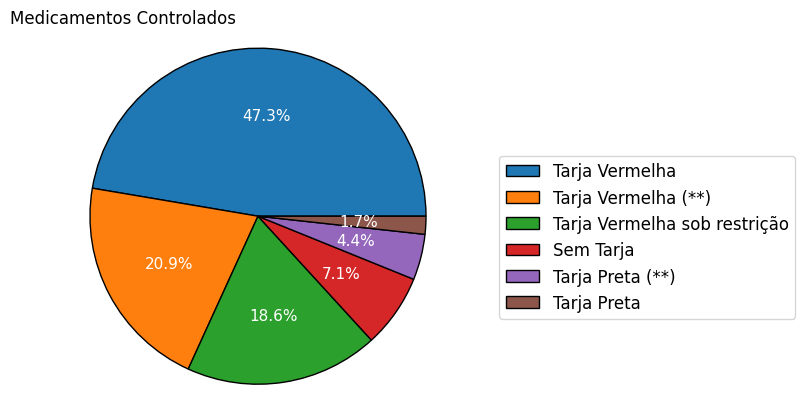

In [99]:
count = df['CLASSIFICAÇÃO'].value_counts().values
classificacao = df['CLASSIFICAÇÃO'].value_counts().index
#Representacao da porcentagem de acordo com a classificacao dos produtos
plt.pie(count,autopct='%1.1f%%',  
        #colors = ["#fa3b3b", "#bf0b0b", "#fa0000", "#eeeeee", "#000000", "#444444"],
        labeldistance = 1.1,
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 11, 'color':'white'}, 
        )
plt.axis("equal")
plt.legend(fontsize=12, loc = 'lower right',  labels=classificacao,bbox_to_anchor=(1.6, 0.2))
plt.title("Medicamentos Controlados" , loc='left')
plt.show()

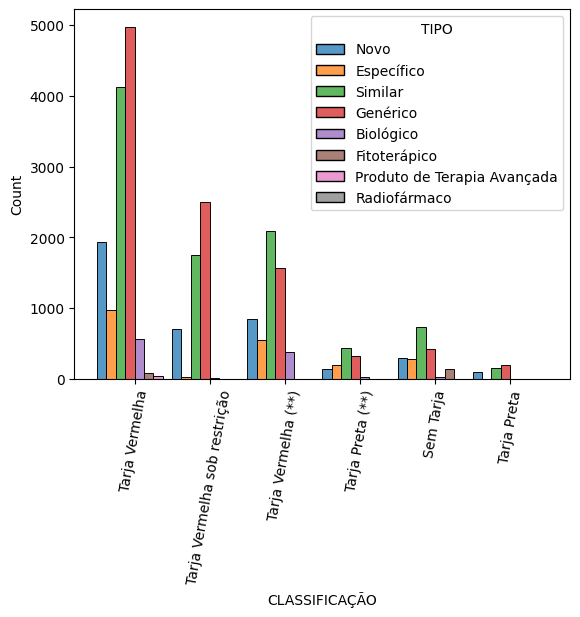

In [100]:
eixo_x = sns.histplot(x = df['CLASSIFICAÇÃO'], hue=df['TIPO'], multiple="dodge", 
shrink = 1, common_norm=False)
eixo_x.tick_params(axis='x', rotation=80)

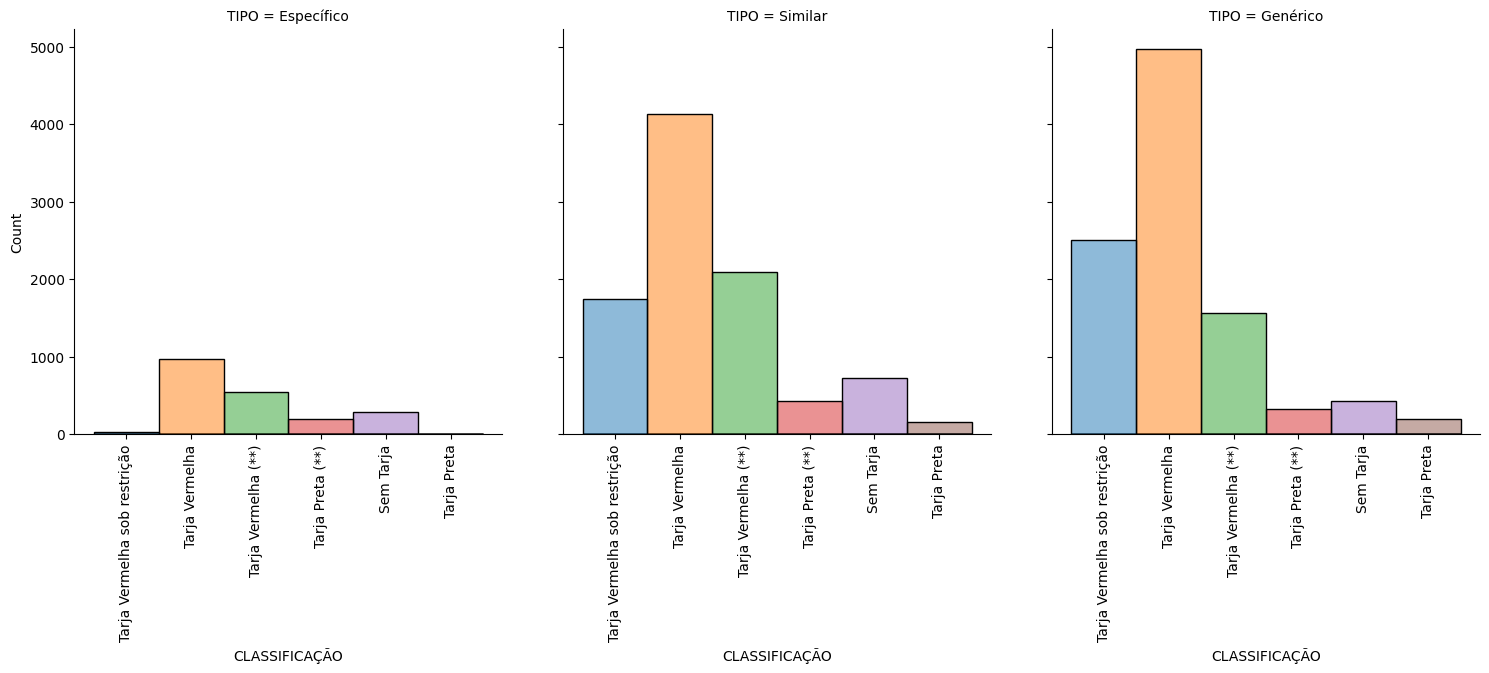

In [101]:
#Filtar a coluna tipo somente com valores especificos
filtered_df = df[df['TIPO'].isin(['Específico', 'Genérico', 'Similar'])]
P = sns.displot(filtered_df, x="CLASSIFICAÇÃO", hue="CLASSIFICAÇÃO", col="TIPO", col_wrap=3,height=5,legend=False )
P.tick_params(axis='x', rotation=90)
plt.show()

## 4. Ajustes finais no DF para apresentação dos graficos novamente

In [102]:
#Filtrar coluna Classificação, armazenando tudo que conter a palavra vermelha ou preta.
filtro_vermelho = df['CLASSIFICAÇÃO'].str.contains('Vermelha').fillna(False)
filtro_preto = df['CLASSIFICAÇÃO'].str.contains('Preta').fillna(False)
#Sobreescrevendo os valores
df.loc[filtro_vermelho, 'CLASSIFICAÇÃO'] = 'Tarja Vermelha'
df.loc[filtro_preto, 'CLASSIFICAÇÃO'] = 'Tarja Preta'
df = df.dropna(subset=['CLASSIFICAÇÃO'])
df.head(200)

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO,REGIME DE PREÇO,PF Sem Impostos,PF 0%,PMC,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2022,CLASSIFICAÇÃO
0,BUTILBROMETO DE ESCOPOLAMINA,61.082.426/0002-07,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,BUSCOPAN,20 MG SOL INJ CT 5 AMP VD TRANS X 1 ML,A3A - ANTIESPASMÓDICOS E ANTICOLINÉRGICOS PUROS,Novo,Regulado,7.93,8.88,11.91,Não,Negativa,Sim,Tarja Vermelha
1,DIPIRONA MONOIDRATADA/BUTILBROMETO DE ESCOPOLA...,61.082.426/0002-07,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,BUSCOPAN COMPOSTO,"(4,0 + 500,0) MG/ML SOL INJ IV/IM CT 3 AMP VD ...",A3D - ASSOCIAÇÕES DE ANTIESPASMÓDICOS COM ANAL...,Novo,Regulado,11.00,12.32,16.53,Não,Negativa,Sim,Tarja Vermelha
3,CIPIONATO DE TESTOSTERONA,00.923.140/0001-31,EMS SIGMA PHARMA LTDA,DEPOSTERON,100 MG/ML SOL INJ CX 3 AMP VD AMB X 2 ML,"G3B - ANDRÓGENOS EXCLUINDO G3E, G3F",Similar,Regulado,142.59,159.70,214.23,Não,Negativa,Sim,Tarja Vermelha
4,CLORIDRATO DE ESCETAMINA,51.780.468/0001-87,JANSSEN-CILAG FARMACÊUTICA LTDA,SPRAVATO,"140 MG/ML SOL SPR NAS CT FR VD TRANS X 0,2 ML ...",N6A9 - ANTIDEPRESSIVOS TODOS OS OUTROS,Novo,Regulado,1566.27,1754.22,NaN,Não,Negativa,Sim,Tarja Vermelha
5,ATORVASTATINA CÁLCICA,03.485.572/0001-04,GEOLAB INDÚSTRIA FARMACÊUTICA S/A,ATORVASTATINA CÁLCICA,20 MG COM REV CT BL AL AL X 500 (EMB HOSP),"C10A1 - ESTATINAS, INIBIDORES DA REDUTASE HMG-CoA",Genérico,Regulado,934.16,934.16,NaN,Não,Positiva,Não,Tarja Vermelha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,ACETATO DE CIPROTERONA/ETINILESTRADIOL,09.545.589/0001-88,MABRA FARMACEUTICA LTDA,ACETATO DE CIPROTERONA+ETINILESTRADIOL,"2 MG + 0,035 MG COM REV CT BL AL PLAS TRANS X 21",G3A1 - HORMÔNIOS CONTRACEPTIVOS MONOFÁSICOS CO...,Genérico,Regulado,15.19,15.19,21.00,Não,Positiva,Sim,Tarja Vermelha
204,ACETATO DE CIPROTERONA/VALERATO DE ESTRADIOL,60.665.981/0001-18,UNIÃO QUÍMICA FARMACÊUTICA NACIONAL S/A,CLIMENE,2 MG COM REV X 11 + (2 + 1) MG COM REV X 10 CT...,G3F - ASSOCIAÇÕES DE ESTRÓGENOS E PROGESTÓGENOS,Novo,Regulado,23.64,23.64,32.68,Não,Positiva,Não,Tarja Vermelha
205,ACETATO DE CLORMADINONA/ETINILESTRADIOL,61.190.096/0001-92,EUROFARMA LABORATÓRIOS S.A.,ACETATO DE CLORMADINONA + ETINILESTRADIOL,"(2,0 + 0,03) MG COM REV CT BL AL PLAS PVC/PVDC...",G3A1 - HORMÔNIOS CONTRACEPTIVOS MONOFÁSICOS CO...,Genérico,Regulado,24.17,24.17,33.41,Não,Positiva,Sim,Tarja Vermelha
206,ACETATO DE CLORMADINONA/ETINILESTRADIOL,61.190.096/0001-92,EUROFARMA LABORATÓRIOS S.A.,AMORA,"(2,0 + 0,03) MG COM REV CT BL AL PLAS PVC/PVDC...",G3A1 - HORMÔNIOS CONTRACEPTIVOS MONOFÁSICOS CO...,Similar,Regulado,27.09,27.09,37.45,Não,Positiva,Sim,Tarja Vermelha


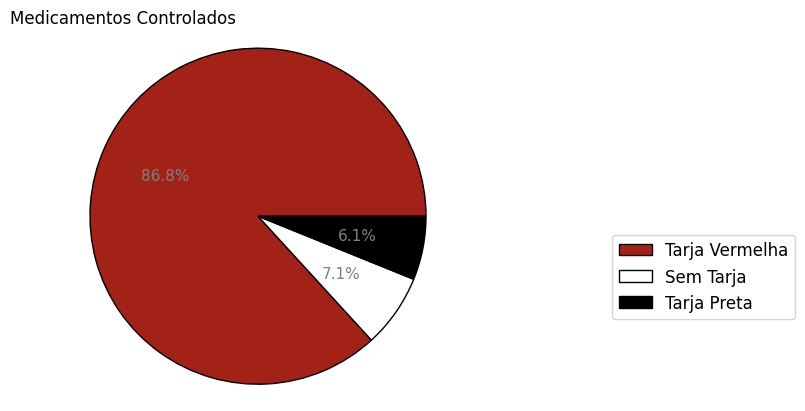

In [111]:
count = df['CLASSIFICAÇÃO'].value_counts().values
classificacao = df['CLASSIFICAÇÃO'].value_counts().index
#Representacao da porcentagem de acordo com a classificacao dos produtos
plt.pie(count,autopct='%1.1f%%',  
        colors = ["#a32218", "#FFFFFF" , "#000000"],
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 11, 'color':'Grey'}, 
        )
plt.axis("equal")
#Especificações Legenda
plt.legend(fontsize=12, loc = 'lower right',  labels=classificacao,bbox_to_anchor=(1.6, 0.2))
plt.title("Medicamentos Controlados" , loc='left')
plt.show()

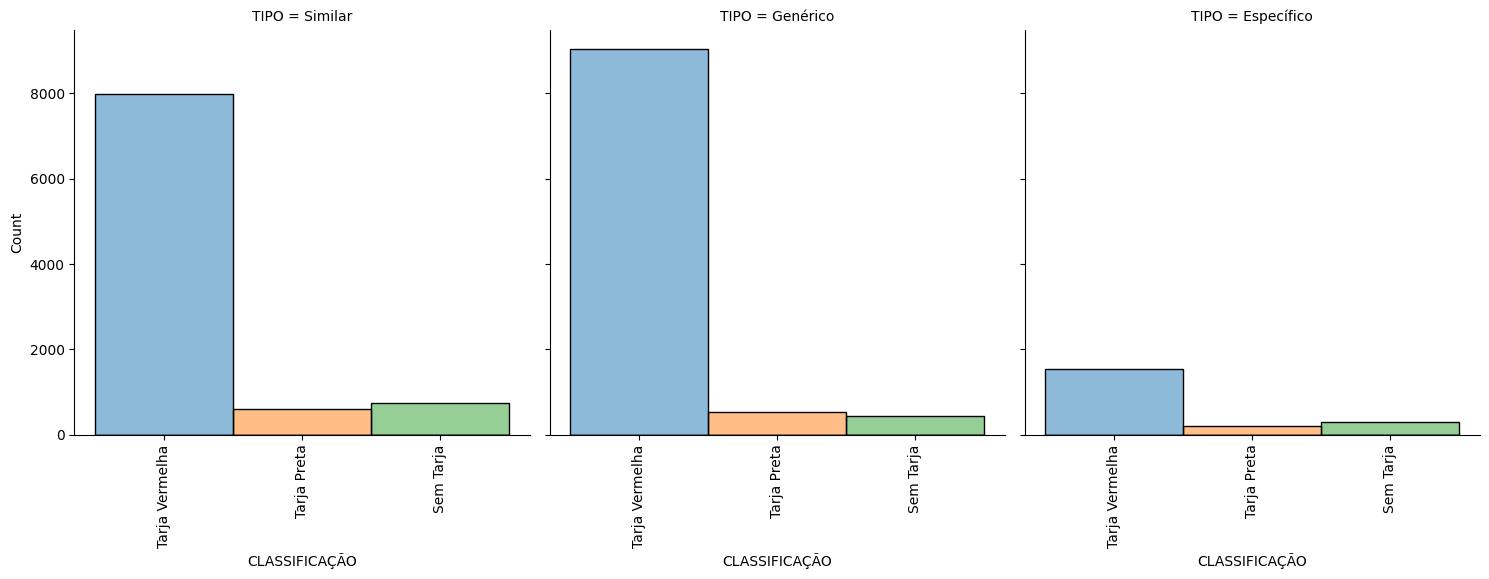

In [60]:
filtro_df = df[df['TIPO'].isin(['Específico', 'Genérico', 'Similar'])]
P = sns.displot(filtro_df, x="CLASSIFICAÇÃO", hue="CLASSIFICAÇÃO", col="TIPO", col_wrap=3,height=5,legend=False )
P.tick_params(axis='x', rotation=90)
plt.show()

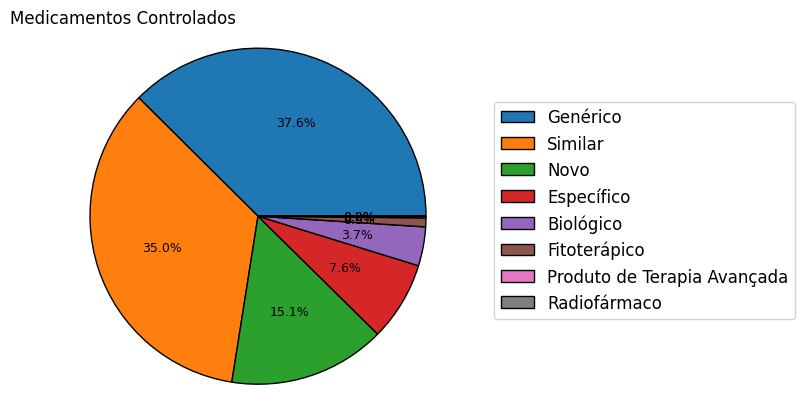

In [121]:
                 
count = df['TIPO'].value_counts().values
classificacao = df['TIPO'].value_counts().index
#Representacao da porcentagem de acordo com a classificacao dos produtos
plt.pie(count,autopct='%1.1f%%',  
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 9,'color':'k'}, 
        )
plt.axis("equal")
#Especificações Legenda
plt.legend(fontsize=12, loc = 'lower right',  labels=classificacao,bbox_to_anchor=(1.6, 0.2))
plt.title("Medicamentos Controlados" , loc='left')
plt.show()

## 5. Resultados

- Quantidade de medicamentos genericos maior em relacao aos medicamentos especificos  (37.6% Generico vs 7.6% Específico)
- Somente 20.9% dos remedios de tarja Vermelha necessitam a retenção do receituario original
- 4,4% Medicamentos de tarja preta ** (super restritos)
- Medicamento ZOLGENSMA como o medicamento mais caro, comercializado no Brasil (R$7.600.207,96)
- 28797 Medicamentos Comercializados no Brasil atualmente
- 4 Laboratorios que fabricam acima de 1000 diferentes produtos
- EMS S/A com a maior gama de medicamentos 1709
- 464 Medicamentos com preco de fabrica acima de R$ 10.000,00
- 99 medicamentos que utilizam DIPIRONA em sua composição